## **4. Noise & Filtering Techniques**
- Types of noise: Gaussian, Salt & Pepper
- Smoothing filters:
  - Mean / Box filter
  - Gaussian filter
  - Median filter
  - Bilateral filter (edge-preserving)

In [ ]:
import matplotlib.pyplot as plt
import cv2

def show_comparison(original, processed, title_processed):
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap="gray")
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(processed, cmap="gray")
    plt.title(title_processed)
    plt.axis("off")

    plt.tight_layout()
    plt.show()


## **4.1. Image Noise**

Image noise refers to random variations in pixel intensity values that do not correspond to the actual scene content. Such disturbances commonly arise during image acquisition due to sensor imperfections, electronic interference, or unfavorable environmental conditions. Noise degrades image quality and can significantly affect subsequent image processing tasks such as segmentation and feature extraction.

Gaussian noise is a widely used noise model in which the noise values follow a normal distribution. In this model, noise is added independently to each pixel, typically with zero mean and a variance that controls the noise intensity. Gaussian noise appears as fine-grained fluctuations spread uniformly across the image and is often associated with thermal noise in sensors or low-light imaging conditions. Because of its statistical properties, Gaussian noise can be effectively reduced using linear smoothing filters.

Salt and pepper noise, also known as impulse noise, is characterized by randomly occurring pixels that take on extreme intensity values, usually black or white. Unlike Gaussian noise, only a small fraction of pixels are affected, but the corruption is severe. This type of noise is commonly caused by transmission errors, faulty sensor elements, or bit errors in digital systems. Its impulsive nature makes linear averaging filters ineffective for noise removal.

In [ ]:
img_lena = cv2.imread("lena.jpg", cv2.IMREAD_GRAYSCALE)
img_sudoku = cv2.imread("sudoku.png", cv2.IMREAD_GRAYSCALE)
img_chessboard = cv2.imread("chessboard.png", cv2.IMREAD_GRAYSCALE)

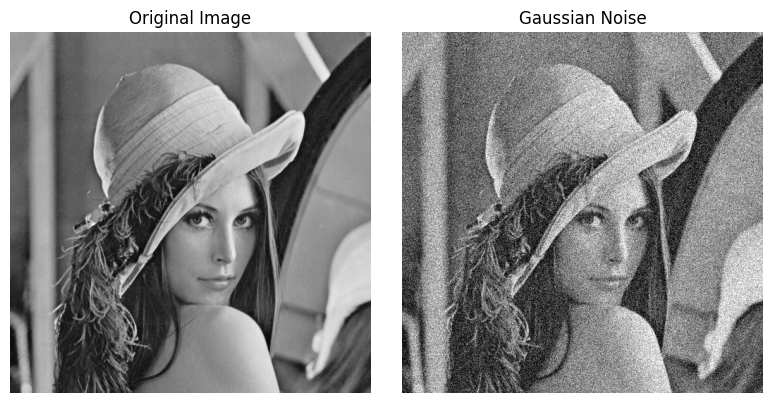

In [ ]:
import cv2
import numpy as np

def add_gaussian_noise(img, mean=0, sigma=30):
    noise = np.random.normal(mean, sigma, img.shape).astype(np.float32)
    noisy = img.astype(np.float32) + noise
    return np.clip(noisy, 0, 255).astype(np.uint8)

gaussian_noisy = add_gaussian_noise(img_lena)

show_comparison(img_lena, gaussian_noisy, "Gaussian Noise")

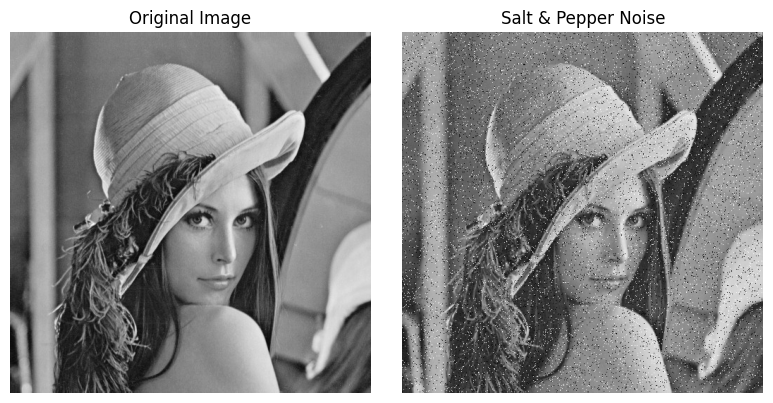

In [ ]:
def add_salt_pepper_noise(img, amount=0.03):
    noisy = img.copy()
    num_pixels = int(amount * img.size)

    coords = [
        np.random.randint(0, i - 1, num_pixels)
        for i in img.shape
    ]
    noisy[coords[0], coords[1]] = 255

    coords = [
        np.random.randint(0, i - 1, num_pixels)
        for i in img.shape
    ]
    noisy[coords[0], coords[1]] = 0

    return noisy

sp_noisy = add_salt_pepper_noise(img_lena)

show_comparison(img_lena, sp_noisy, "Salt & Pepper Noise")

## **4.2 Smoothing and Blurring Filters**

Smoothing filters aim to reduce noise by suppressing high-frequency components in an image. While effective at noise reduction, these filters often introduce blurring and may degrade important image features such as edges and fine details.

The mean filter, also referred to as the box filter, is one of the simplest smoothing techniques. It replaces each pixel value with the average of the intensities in its local neighborhood. This uniform averaging reduces random intensity variations but also causes significant blurring, especially around edges, since all pixels within the window contribute equally to the result. As a consequence, the mean filter is generally unsuitable for images containing sharp transitions or impulse noise.

The Gaussian filter improves upon simple averaging by assigning weights to neighboring pixels according to a Gaussian distribution. Pixels closer to the center of the kernel have a stronger influence on the output value, resulting in a smoother and more natural blurring effect. The extent of smoothing is controlled by the standard deviation of the Gaussian function. Gaussian filtering is particularly effective for reducing Gaussian noise; however, it still blurs edges and is ineffective against impulse noise.

The median filter is a non-linear smoothing technique that replaces each pixel with the median intensity value of its neighborhood. Instead of averaging, it removes outlier values, making it especially effective for salt and pepper noise. Because the median operation does not create new intensity values, edges are preserved more effectively than with linear filters. Nevertheless, excessive use of median filtering can remove thin structures and small details in the image.

The bilateral filter is an edge-preserving smoothing method that combines spatial closeness and intensity similarity in its weighting scheme. Pixels that are spatially close and have similar intensity values contribute more strongly to the filtered result, while pixels across edges contribute very little. This allows the bilateral filter to reduce noise within homogeneous regions while maintaining sharp edges. Although highly effective for detail-preserving denoising, the bilateral filter is computationally expensive and sensitive to parameter selection.

| Filter    | Best For             | Blurring    | Edge Preservation |
| --------- | -------------------- | ----------- | ----------------- |
| Mean      | Light Gaussian noise | High        | Poor              |
| Gaussian  | Gaussian noise       | Medium-High | Poor              |
| Median    | Salt & Pepper noise  | Low         | Good              |
| Bilateral | Mixed noise          | Low-Medium  | Excellent         |


In [ ]:
gaussian_noisy = add_gaussian_noise(img_chessboard, sigma=50)
sp_noisy = add_salt_pepper_noise(img_sudoku, amount=0.05)

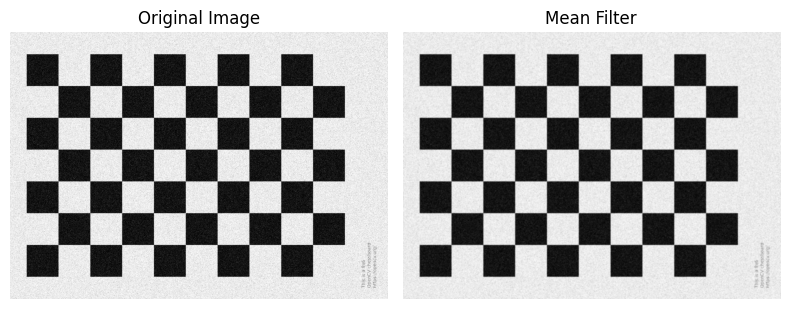

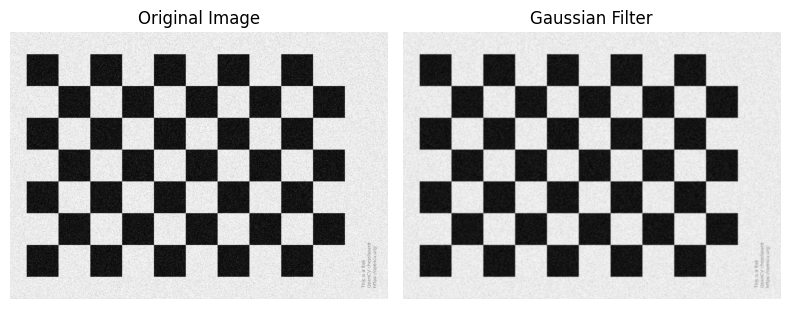

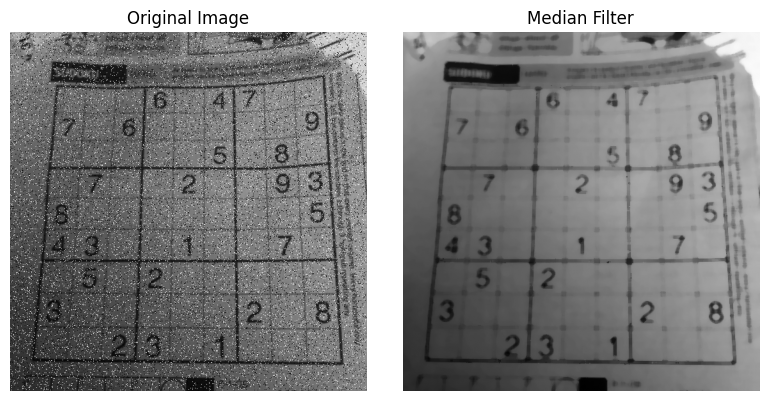

In [ ]:
mean_filtered = cv2.blur(gaussian_noisy, (5, 5))
show_comparison(gaussian_noisy, mean_filtered, "Mean Filter")

gaussian_filtered = cv2.GaussianBlur(gaussian_noisy, (5, 5), sigmaX=3.0)
show_comparison(gaussian_noisy, gaussian_filtered, "Gaussian Filter")

median_filtered = cv2.medianBlur(sp_noisy, 9)
show_comparison(sp_noisy, median_filtered, "Median Filter")

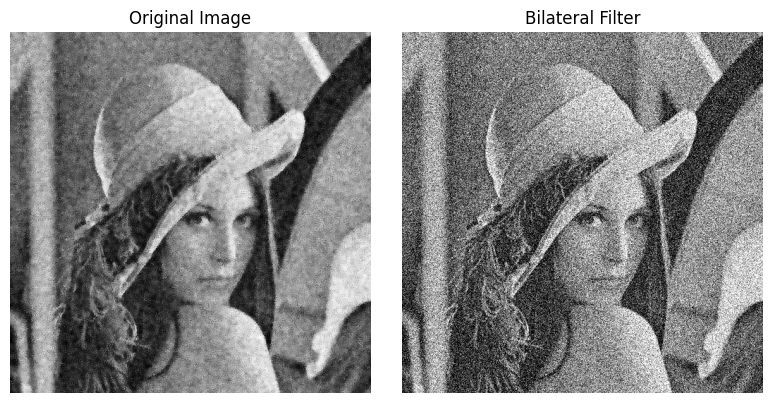

In [ ]:
gaussian_noisy = add_gaussian_noise(img_lena, sigma=50)
bilateral_filtered = cv2.bilateralFilter(
    gaussian_noisy,
    d=9,
    sigmaColor=75,
    sigmaSpace=75
)

show_comparison(bilateral_filtered, gaussian_noisy, "Bilateral Filter")

## **4.3. Comparative Analysis**

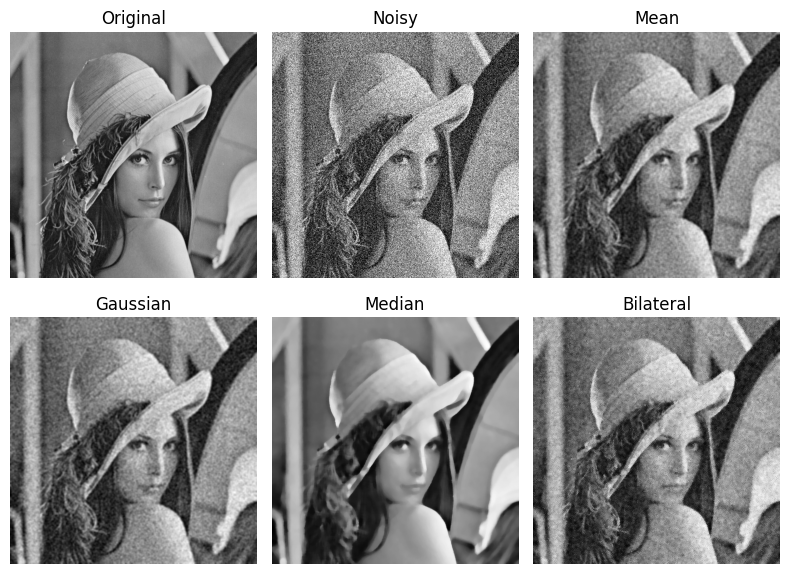

In [ ]:
import matplotlib.pyplot as plt

gaussian_noisy_lena = add_gaussian_noise(img_lena, sigma=50)
sp_noisy_lena = add_salt_pepper_noise(img_lena, amount=0.05)

mean_filtered_lena = cv2.blur(gaussian_noisy_lena, (5, 5))
gaussian_filtered_lena = cv2.GaussianBlur(gaussian_noisy_lena, (5, 5), sigmaX=3.0)
median_filtered_lena = cv2.medianBlur(sp_noisy_lena, 9)

titles = ["Original", "Noisy", "Mean", "Gaussian", "Median", "Bilateral"]
images = [
    img_lena,
    gaussian_noisy_lena,
    mean_filtered_lena,
    gaussian_filtered_lena,
    median_filtered_lena,
    bilateral_filtered
]

plt.figure(figsize=(8, 6))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()

## **4.4. Parameter Sensitivity Analysis**

This experiment investigates how filter parameters influence noise removal, image blurring, and edge preservation. All experiments are conducted on a fixed noisy image while varying a single filter parameter.

For consistency, Gaussian noise is added once and the same noisy image is used throughout the analysis.



1. Gaussian Filter: Effect of σ (Standard Deviation)

The standard deviation σ controls the amount of smoothing applied by the Gaussian filter. Increasing σ increases the contribution of distant pixels, resulting in stronger blurring.

Small σ values reduce noise slightly while preserving image details. As σ increases, noise is further suppressed but edges and fine structures become progressively blurred. Excessive smoothing leads to loss of important features.

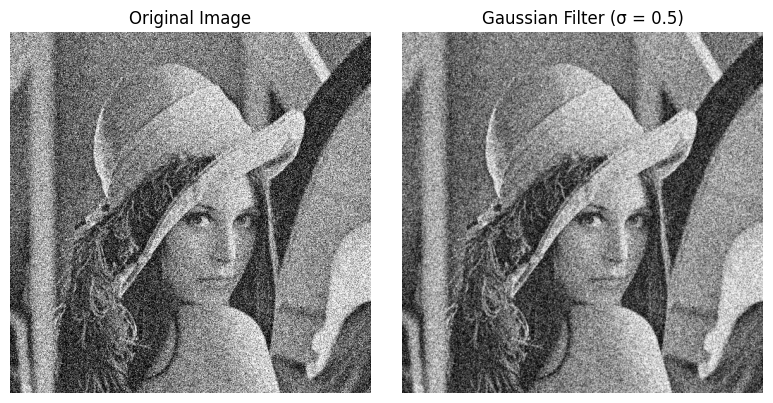

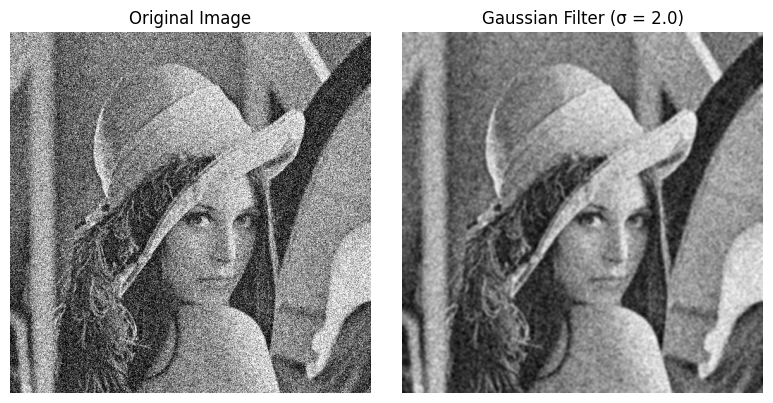

In [ ]:
sigmas = [0.5, 1.0, 2.0]

for sigma in sigmas:
    filtered = cv2.GaussianBlur(gaussian_noisy, (5, 5), sigmaX=sigma)
    show_comparison(
        gaussian_noisy,
        filtered,
        f"Gaussian Filter (σ = {sigma})"
    )

Median Filter: Effect of Kernel Size

The kernel size determines the neighborhood used to compute the median value. Larger kernels increase noise removal but may eliminate small image details.

Small kernels effectively remove isolated impulse noise while preserving edges. Larger kernels remove more noise but can distort thin lines and small structures, especially in images such as sudoku or chessboard.

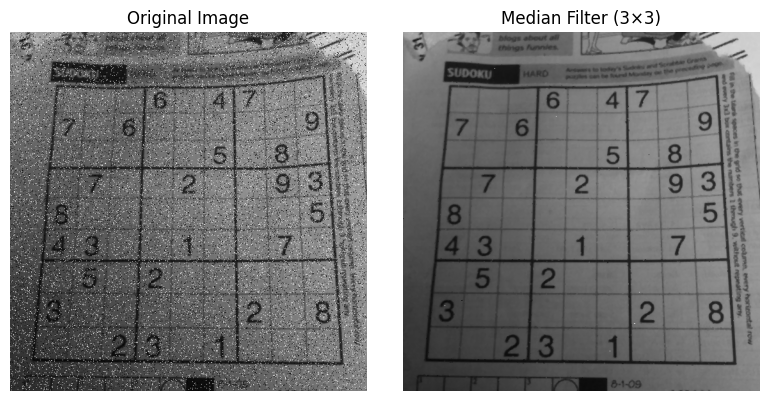

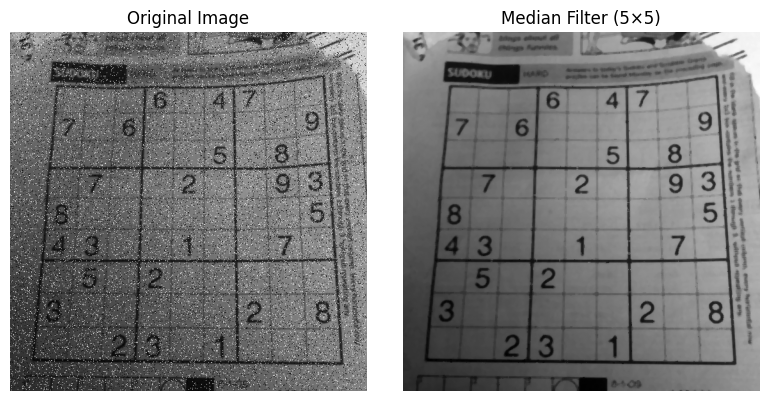

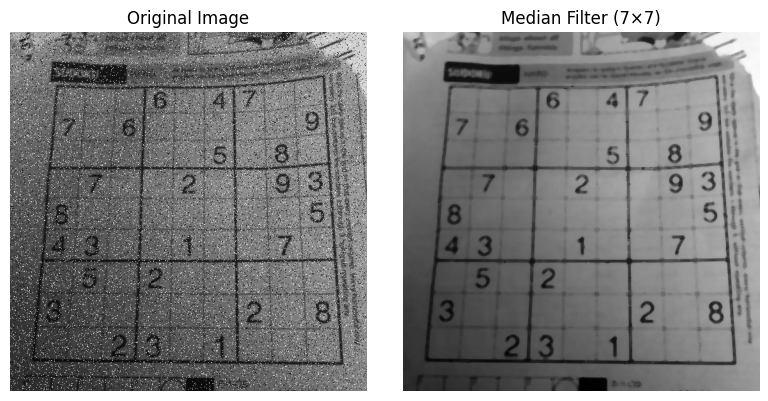

In [ ]:
kernel_sizes = [3, 5, 7]

for k in kernel_sizes:
    filtered = cv2.medianBlur(sp_noisy, k)
    show_comparison(
        sp_noisy,
        filtered,
        f"Median Filter ({k}×{k})"
    )

The parameter σᵣ controls how much intensity differences are tolerated during filtering. Larger values allow averaging across edges.

Small σᵣ values strongly preserve edges but limit noise reduction. As σᵣ increases, smoothing becomes stronger and the filter behavior gradually approaches that of Gaussian smoothing, resulting in edge degradation.

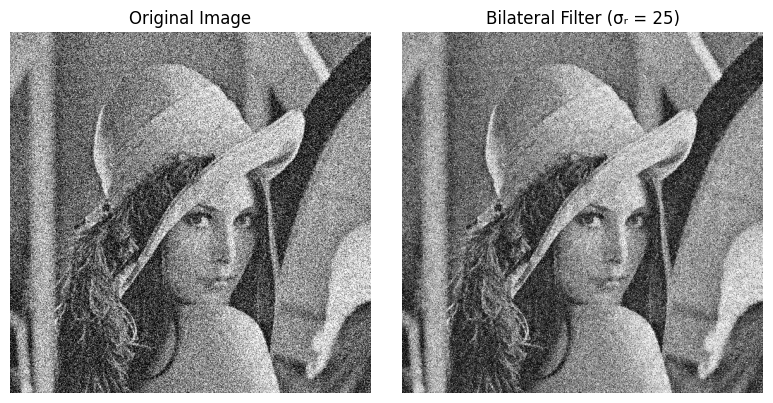

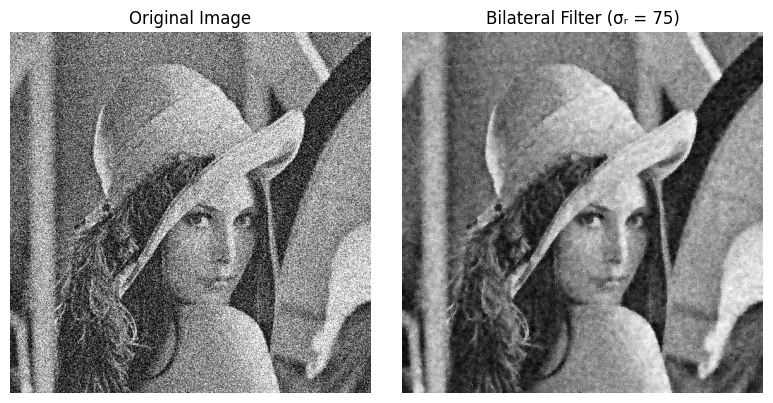

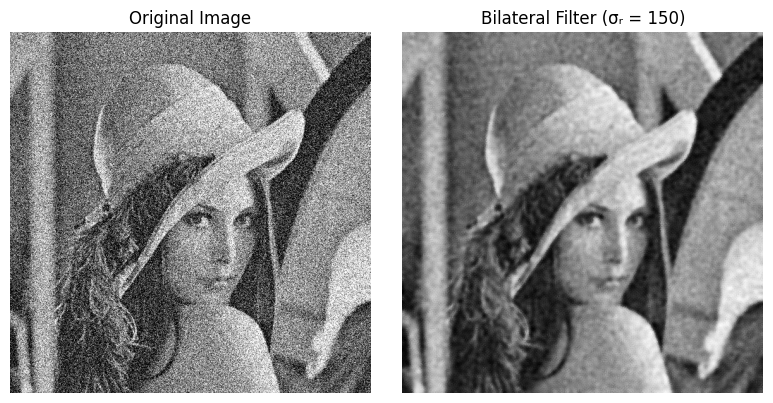

In [ ]:
sigma_colors = [25, 75, 150]

for sc in sigma_colors:
    filtered = cv2.bilateralFilter(
        gaussian_noisy_lena,
        d=9,
        sigmaColor=sc,
        sigmaSpace=75
    )
    show_comparison(
        gaussian_noisy_lena,
        filtered,
        f"Bilateral Filter (σᵣ = {sc})"
    )
